# Model Selection

## Task A

In this notebook, we will assume a pre processed dataset, which was developed in a previous notebook. <br>
We'll evaluate a couple of classifiers performance, when tasked with predicting *gender* and *smiling state* of an image.
We'll then perform an evaluation of pre-processing methods on the datasets.

### Import Modules
These are home made modules to import, split and pre-process the dataset

In [1]:
# To modularise the program, we need to add the current directory to sys path
import os
import sys

# Navigate to where our modules are stored
os.chdir('/Users/gardar/Documents/UCL/ELEC0134 MLS-I Applied Machine Learning Systems/Assignments/Final/code')

# Now we can import our own modules into our script.
import import_data as ds
import split_dataset as sd 
import pre_processing as prp

### Load Data

The data are stored in a local directory, we call a function to properly import them

Importing image data...
Image data is stored in numpy array 'X' of size: (5000, 218, 178, 3)
Importing labels...
Label data is stored in Pandas DataFrame 'y' with dimensions: (5000, 4)
Displaying random images and corresponding labels from set...


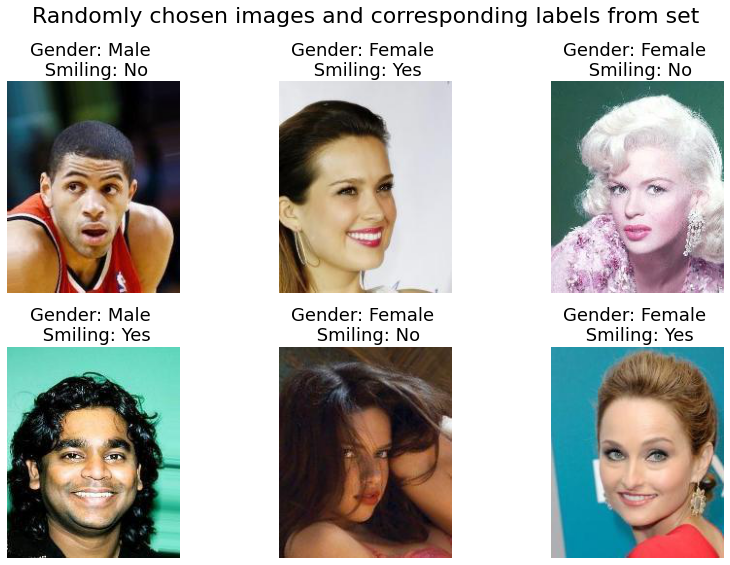

In [2]:
"""
L O A D   D A T A 
"""
# Define a path to the data - REMEMBER TO RESET THIS BEFORE TURNING IN
img_path = "/Users/gardar/Documents/UCL/ELEC0134 MLS-I Applied Machine Learning Systems/Assignments/dataset_AMLS_20-21/celeba/img/"
label_path = "/Users/gardar/Documents/UCL/ELEC0134 MLS-I Applied Machine Learning Systems/Assignments/dataset_AMLS_20-21/celeba/"

# Load image and label data with the novel 'import_data' module
X , y , random_img = ds.dataImport(img_path,label_path,surpress=False,return_img_indices=True)

### Split Data
We'll then split the data into training-, validation- and test folds.

Plotting the dataset split...


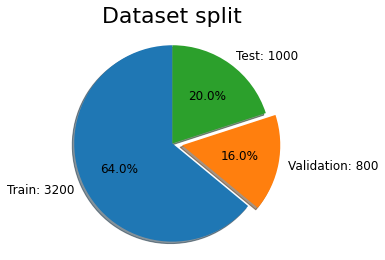

In [3]:
"""
S P L I T   D A T A
"""
    
# Split dataset into train-, validation- and test folds
Xtrain,Xval,Xtest,ytrain,yval,ytest = sd.split_dataset(X,y,test_size=0.2,val_size=0.2,surpress=False)

### Pre-Process Data
Prior to training our classifiers on the data, we perform pre-processing.
This involves some image processing, in the form of merging the RGB channels to a single Grayscale plane, centering the image data on the mean, and then performing principal component analysis with Singular Value Decomposition.

Encoding RGB channels to Rec. 601 grayscale...
Centering images...
Displaying the average face from the data...


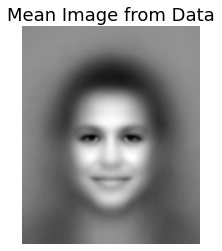

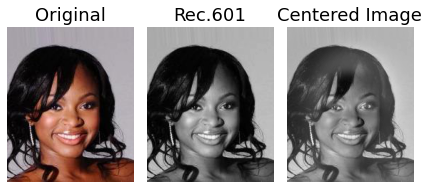

Encoding RGB channels to Rec. 601 grayscale...
Centering images...
Encoding RGB channels to Rec. 601 grayscale...
Centering images...
Performing PCA with Singular Value Decomposition...
Displaying scree plot...


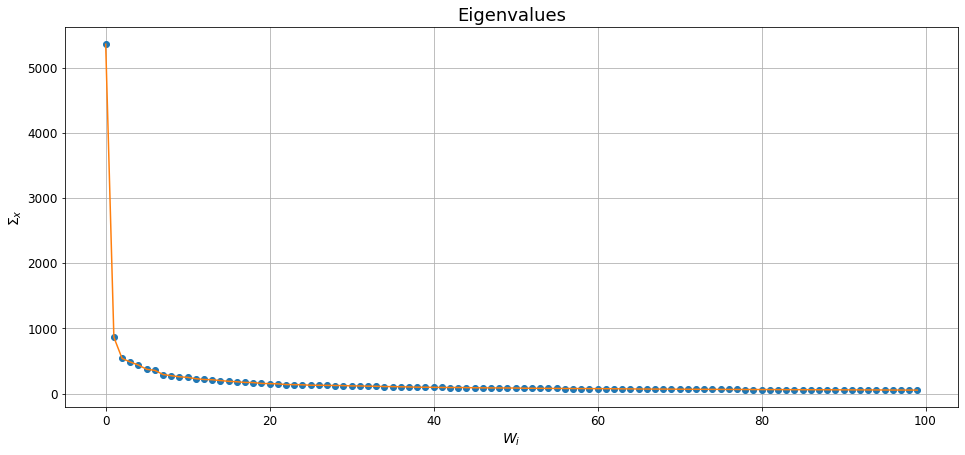

In [4]:
"""
P R E - P R O C E S S   D A T A 
"""
# Center images on mean
Xtrain = prp.imgProcessing(Xtrain,surpress=False)
Xval = prp.imgProcessing(Xval,surpress=True)
Xtest = prp.imgProcessing(Xtest,surpress=True)

# Perform PCA on test data to obtain eigenvalues and vectors
Sigma,WT = prp.PCA_w_SVD(Xtrain,surpress=False)

### Eigenfaces
The "essentially extracted" training data is now in the form of eigenvectors, which are indicative of the sample's deviation from the mean.

Displaying 10 first eigenfaces...


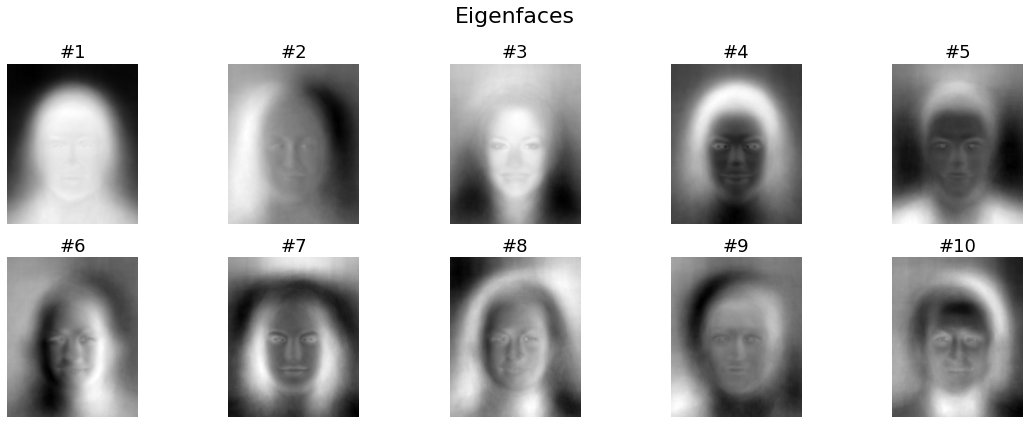

In [5]:
"""
V I S U A L I S E   E I G E N F A C E S 
"""
# Let's check what these spooky eigenfaces look like
prp.showEigenfaces(WT,X)

### Fit Validation and Test 

We now transform our training, validation and testing data so that it fits the base established by the Principal Component Analysis:

In [6]:
"""
F I T   V A L I D A T I O N   A N D   T E S T   T O   P C A 
"""
Xtrain = prp.fitPCA(WT,Xtrain,n_components=20)
Xval = prp.fitPCA(WT,Xval,n_components=20)
Xtest = prp.fitPCA(WT,Xtest,n_components=20)

Fitting to PCA base
Fitting to PCA base
Fitting to PCA base


And verify that the shape is as should be:

In [7]:
Xtrain.shape

(3200, 20)

### Prepare Labels

In [8]:
# The labels are -1 = Female, 1 = Male
# Here, I'm transferring them to the space I € [0...1]
ytrain_A1 = ytrain['gender'].values[:]
ytrain_A1[ytrain_A1<0] = 0
yval_A1 = yval['gender'].values[:]
yval_A1[yval_A1<0] = 0
ytest_A1 = ytest['gender'].values[:]
ytest_A1[ytest_A1<0]=0

# The labels are -1 = Female, 1 = Male
# Here, I'm transferring them to the space I € [0...1]
ytrain_A2 = ytrain['smiling'].values[:]
ytrain_A2[ytrain_A2<0] = 0
yval_A2 = yval['smiling'].values[:]
yval_A2[yval_A2<0] = 0
ytest_A2 = ytest['smiling'].values[:]
ytest_A2[ytest_A2<0]=0

# Task A with Logistic Regression

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import numpy as np

# Normalise the data to the interval R € [0...1]
scaler = MinMaxScaler() # This estimator scales and translates each feature individually such that it is in the given range on the training set, default between(0,1)
XtrainScl = scaler.fit_transform(Xtrain)
XvalScl = scaler.fit_transform(Xval)
XtestScl = scaler.transform(Xtest)

In [10]:
# sklearn functions implementation
def logRegrPredict(Xtrain,ytrain,Xtest ):
    # Build Logistic Regression Model
    logreg = LogisticRegression(solver='lbfgs') # lbfgs solver used for small datasets, 
    # Train the model using the training sets
    logreg.fit(Xtrain, ytrain)
    ypred= logreg.predict(Xtest)
    #print('Accuracy on test set: {:.2f}'.format(logreg.score(x_test, y_test)))
    return ypred

In [11]:
ypred_A1 = logRegrPredict(XtrainScl, ytrain_A1, XtestScl)

In [12]:
print('Accuracy on test set: '+str(accuracy_score(ytest_A1,ypred_A1)))
print(classification_report(ytest_A1,ypred_A1))#text report showing the main classification metrics

Accuracy on test set: 0.69
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       519
           1       0.66      0.72      0.69       481

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



In [13]:
ypred_A2 = logRegrPredict(XtrainScl, ytrain_A2, XtestScl)

In [14]:
print('Accuracy on test set: '+str(accuracy_score(ytest_A2,ypred_A2)))
print(classification_report(ytest_A2,ypred_A2))#text report showing the main classification metrics

Accuracy on test set: 0.605
              precision    recall  f1-score   support

           0       0.57      0.74      0.65       486
           1       0.66      0.48      0.55       514

    accuracy                           0.60      1000
   macro avg       0.62      0.61      0.60      1000
weighted avg       0.62      0.60      0.60      1000



# Compare with PCA from Library

Plotting the dataset split...


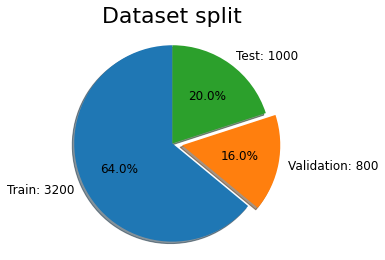

In [58]:
"""
S P L I T   D A T A
"""
    
# Split dataset into train-, validation- and test folds
Xtrain,Xval,Xtest,ytrain,yval,ytest = sd.split_dataset(X,y,test_size=0.2,val_size=0.2,surpress=False)

In [59]:
#Xtrain = prp.reduceRGB(Xtrain)
#Xval = prp.reduceRGB(Xval)
#Xtest = prp.reduceRGB(Xtest)

In [60]:
N,h,w,RGB = Xtrain.shape
Xtrain = np.reshape(Xtrain, (N,h * w * RGB)) 
N,h,w, RGB = Xval.shape
Xval = np.reshape(Xval, (N,h * w * RGB))
N,h,w, RGB = Xtest.shape
Xtest = np.reshape(Xtest, (N,h * w * RGB)) 

## Library PCA

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=500)
pca.fit(Xtrain)

PCA(n_components=500)

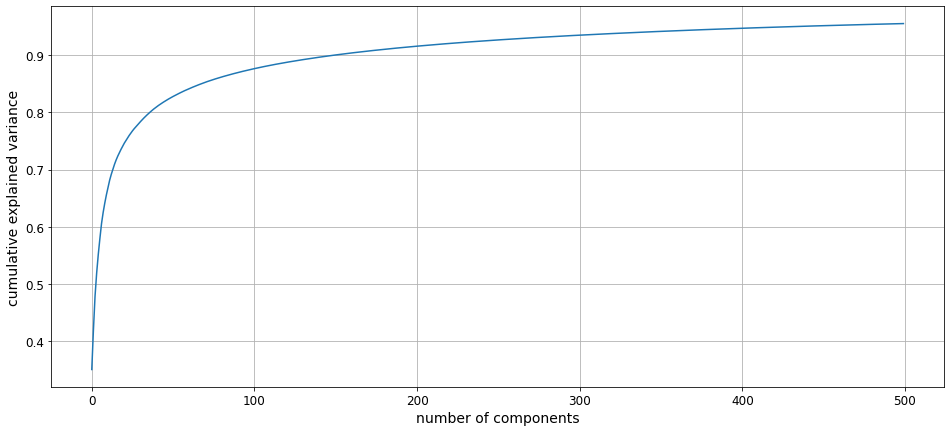

In [62]:
plt.figure(figsize=(16,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid("on")

In [63]:
Xtrain = pca.transform(Xtrain)
Xval = pca.transform(Xval)
Xtest = pca.transform(Xtest)

In [64]:
# Normalise the data to the interval R € [0...1]
scaler = MinMaxScaler() # This estimator scales and translates each feature individually such that it is in the given range on the training set, default between(0,1)
XtrainScl = scaler.fit_transform(Xtrain)
XvalScl = scaler.fit_transform(Xval)
XtestScl = scaler.transform(Xtest)

In [65]:
ypred_A1 = logRegrPredict(XtrainScl, ytrain_A1, XtestScl)

/opt/anaconda3/envs/MLS-I/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [66]:
print('Accuracy on test set: '+str(accuracy_score(ytest_A1,ypred_A1)))
print(classification_report(ytest_A1,ypred_A1))#text report showing the main classification metrics

Accuracy on test set: 0.484
              precision    recall  f1-score   support

           0       0.50      0.34      0.41       519
           1       0.47      0.64      0.54       481

    accuracy                           0.48      1000
   macro avg       0.49      0.49      0.47      1000
weighted avg       0.49      0.48      0.47      1000

